# HW0 - Hello Vision World

In this HW you'll get acquainted with OpenCV in a Python-Jupyter environment.

If you're able to read this you were probably successfull at creating a Python-Jupyter environment.

Next we will import OpenCV, which is called `cv2` (that's the name of the OpenCV module) in python.

In [3]:
import cv2
import numpy as np

In [4]:
# !pip install opencv-python

If that executed without an error - you were also able to install OpenCV.

If that didn't run, try running `pip install opencv-python` or `apt-get install python-opencv` on ubuntu.

Next we will load a test image from scikit-image (`skimage`).

In [5]:
import skimage.data

In [6]:
image = skimage.data.astronaut()

An image is an array of pixels. It has HxWxC shape: (we can interrogate an image for its shape using `.shape`)

In [7]:
image.shape

(512, 512, 3)

This image has Height and Width of 512, and 3 channels: Red, Green, Blue

The channels are the last dimension, meaning the image is stored in memory where every pixel has 3 components, like so: RGB, RGB, RGB, RGB, ...

In [8]:
image[0,0]

array([154, 147, 151], dtype=uint8)

The first pixel in the image has the RGB code: `(154, 147, 151)`, which is kind of a grayish color.

Let's plot out a small patch of the image (10x10 pixels top-left):

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

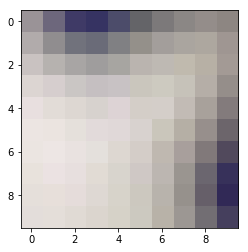

In [10]:
plt.imshow(image[0:10,0:10])

We can do many things with images, such as make them grayscale:

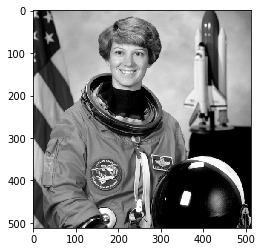

In [11]:
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY), cmap='gray')

By default images have values \[0,255\] and their pixels are stored in `uint8` (bytes, unsigned chars)

In [12]:
image.dtype

dtype('uint8')

But we can change that easily, say to 32-bit floating point (e.g. `float32`):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


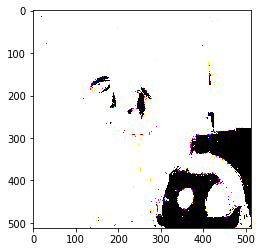

In [13]:
plt.imshow(image.astype(np.float32))

Ah, Matplotlib is complaining that floating point images are usually in range of \[0,1\] and not \[0,255\] like `uint8`s.

So we can easily divide the values element-wise:

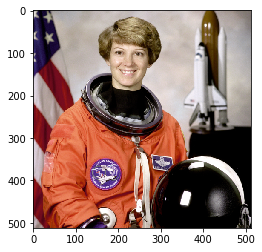

In [14]:
plt.imshow(image.astype(np.float32) / 255.)

Now it looks the same as before.

We can also flip images in different directions:

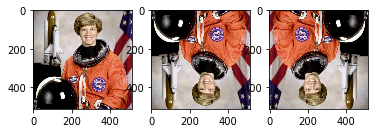

In [15]:
plt.subplot(1,3,1),plt.imshow(cv2.flip(image.copy(), 1))
plt.subplot(1,3,2),plt.imshow(cv2.flip(image.copy(), -1))
plt.subplot(1,3,3),plt.imshow(cv2.flip(image.copy(), 0));

We can blur them:

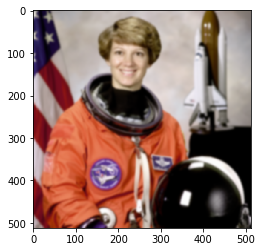

In [16]:
plt.imshow(cv2.GaussianBlur(image.copy(), ksize=(11,11), sigmaX=-1))

---
---

## Here comes your part

<img src="http://thuglifememe.com/wp-content/uploads/2017/08/22-you-got-this-meme-9.jpg"/>

### Image blur

1) Load the astronaut image to a variable, convert to grayscale and convert to a [0,1] floating point.

2) Blur it with a 11x11 **Box filter** (`cv2.boxFilter`), and a 11x11 **Gaussian filter**

3) Subtract the blurred images from the original

4) Show the results to the notebook (`plt.imshow(...)`) side-by-side (`plt.subplot(1,2,1)`), with a colorbar (`plt.colorbar()`)

In [29]:
# 1) Load the astronaut image to a variable, convert to grayscale and convert to a [0,1] floating point.

# step 1.1 --> Loading the astronaut image to a variable using skimage in-built data API
astronaut_image = skimage.data.astronaut()

# step 1.2 --> convert loaded image from RGB to grayscale using cv2 API
# Hint for grayscale taken from previous example and Open CV Documentation (https://docs.opencv.org/master/)
astronaut_image_as_gray = cv2.cvtColor(astronaut_image, cv2.COLOR_BGR2GRAY)

# step 1.3 --> convert gray scale image to a [0,1] floating point
# First convert the datatype and Normalize
astronaut_image_as_gray_scaled = astronaut_image_as_gray.astype(np.float32) / 255.

In [52]:
#?cv2.boxFilter

In [53]:
#?col_2_ax.imshow

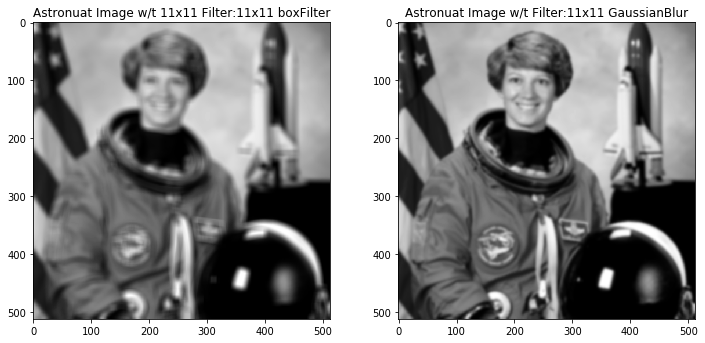

In [60]:
# 2) Blur it with a 11x11 Box filter (cv2.boxFilter), and a 11x11 Gaussian filter
# configuring for two side by side image showcase
# Hint for subplots, title taken from https://matplotlib.org/examples/pylab_examples/subplots_demo.html
fig = plt.figure(figsize=(12,12))


# Blurring the image with box filter with 11x11 filter size
astronaut_image_scaled_boxf = cv2.boxFilter(astronaut_image_as_gray_scaled,ddepth=-1,ksize=(11,11))
# show the image
col_1_ax = fig.add_subplot(2,2,1)
col_1_ax.set_title("Astronuat Image w/t 11x11 Filter:11x11 boxFilter")
col_1_ax.imshow(astronaut_image_scaled_boxf, cmap='gray')


# Blurring the image with Gaussian Filter with 11x11 filter size
astronaut_image_scaled_gaussfblurr = cv2.GaussianBlur(astronaut_image_as_gray_scaled, ksize=(11,11), sigmaX=-1)
# show the image
col_2_ax = fig.add_subplot(2,2,2)
col_2_ax.set_title("Astronuat Image w/t Filter:11x11 GaussianBlur")
col_2_ax.imshow(astronaut_image_scaled_gaussfblurr, cmap='gray')

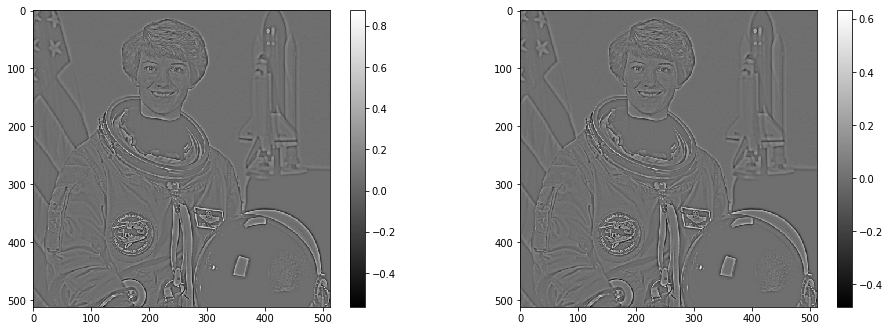

In [79]:
# 3) Subtract the blurred images from the original
# 4) Show the results to the notebook 
#     (plt.imshow(...)) side-by-side (plt.subplot(1,2,1)), 
#     with a colorbar (plt.colorbar())

# configuration for different size of subplots
fig = plt.figure(figsize=(16, 12))

# subtract boxFilter filtered image from original(without blurr) 
substracted_astronaut_image_scaled_boxf = astronaut_image_as_gray_scaled - astronaut_image_scaled_boxf
ax1 = plt.subplot(2,2,1)
pp1= plt.imshow(substracted_astronaut_image_scaled_boxf, cmap='gray')
plt.colorbar(pp1,ax=ax1)


# subtract gaussian blurr image from original(without blurr) 
substracted_astronaut_image_scaled_gaussfblurr = astronaut_image_as_gray_scaled - astronaut_image_scaled_gaussfblurr
plt.imshow(substracted_astronaut_image_scaled_gaussfblurr, cmap='gray')
ax2 = plt.subplot(2,2,2)
pp2 = plt.imshow(substracted_astronaut_image_scaled_gaussfblurr, cmap='gray')
plt.colorbar(pp2,ax=ax2)

In [80]:
# scratch-pad for task-1

# Loading Done, Show the image
# plt.imshow(astronaut_image) #--> works

# Show the converted grayscale image

# astronaut_image_as_gray = cv2.cvtColor(astronaut_image, cv2.COLOR_BGR2GRAY)
# plt.imshow(astronaut_image_as_gray) #--> works, 
# plt.imshow(astronaut_image_as_gray, cmap='gray') #--> works

# astronaut_image_as_gray_scaled = astronaut_image_as_gray.astype(np.float32) / 255.
# astronaut_image_as_gray_scaled #--> checking data
# astronaut_image_as_gray_scaled.dtype #--> checking data type

# subtract boxFilter filtered image from original(without blurr) 
# substracted_astronaut_image_scaled_boxf = astronaut_image_as_gray_scaled - astronaut_image_scaled_boxf
# plt.imshow(substracted_astronaut_image_scaled_boxf, cmap='gray')
# subtract gaussian blurr image from original(without blurr) 
# substracted_astronaut_image_scaled_gaussfblurr = astronaut_image_as_gray_scaled - astronaut_image_scaled_gaussfblurr
# plt.imshow(substracted_astronaut_image_scaled_gaussfblurr, cmap='gray')

In [81]:
# # scratch-pad for task-3,4
# fig = plt.figure(figsize=(12, 12))

# ax1 = plt.subplot(2,2,1)
# pp1= plt.imshow(substracted_astronaut_image_scaled_boxf, cmap='gray')
# plt.colorbar(pp1,ax=ax1)

# ax2 = plt.subplot(2,2,2)
# pp2 = plt.imshow(substracted_astronaut_image_scaled_gaussfblurr, cmap='gray')
# plt.colorbar(pp2,ax=ax2)

See how subtracting the blur (low frequencies) from the original has left only the edges (high frequencies).

Try different kernel sizes to see the effect on the edges.

### Colorspaces

1) Load the astronaut image (RGB)

2) Convert to HSV (`cv2.cvtColor`)

3) Display the H, S and V components, side-by-side

In [62]:
# TODO: your code here

In [82]:
# step 1 --> Loading the astronaut image to a variable using skimage in-built data API
astronaut_RGB = skimage.data.astronaut()

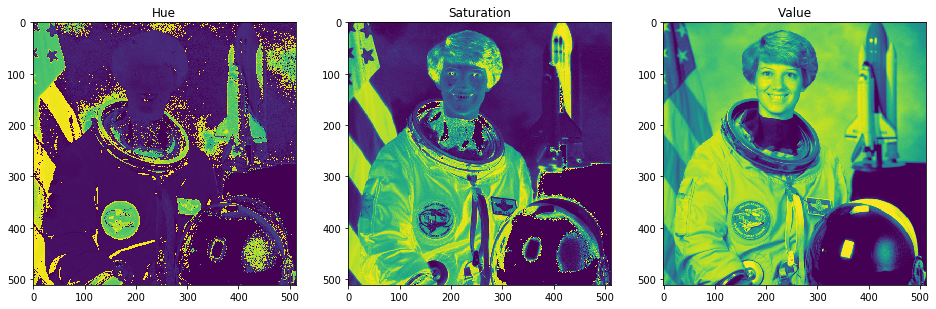

In [95]:
astronaut_HSV = cv2.cvtColor(astronaut_image, cv2.COLOR_RGB2HSV)
# get all the components individually
H = astronaut_HSV[:,:,0]
S = astronaut_HSV[:,:,1]
V = astronaut_HSV[:,:,2]


fig = plt.figure(figsize=(16, 12))

ax  = plt.subplot(2,3,1)
ax.set_title("Hue")
plt.imshow(H)


ax = plt.subplot(2,3,2)
ax.set_title("Saturation")
plt.imshow(S)


ax = plt.subplot(2,3,3)
ax.set_title("Value")
plt.imshow(V)

### 3D Projection

Consider a group of 3D points. 

We have a 100 uniformly distributed points in a volume XYZ: \[-5,5\],\[-5,5\],\[5,100\] (the units are, say, meters).

Some points are close to us (the camera at `(0,0,0)`), they have low Z values, and some are farther away.

In [96]:
pts3d = np.hstack([np.random.uniform(-5,5,(1000,2)),np.random.uniform(5,100,(1000,1))])[:,np.newaxis,:]

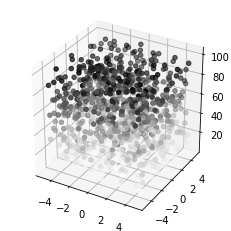

In [97]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pts3d[:,0,0],pts3d[:,0,1],pts3d[:,0,2],c=-pts3d[:,0,2],cmap='gray');
ax.set_aspect('equal');

You're given the following intrinsics matrix (`K`):

In [98]:
K = np.array([[800,0,320],[0,800,240],[0,0,1]], dtype=np.float32)
print(K)

[[800.   0. 320.]
 [  0. 800. 240.]
 [  0.   0.   1.]]


Calculate the 2D projection of the 3D points on the image plane, and plot them (`plt.scatter`).

Try doing the calculation yourself, using matrix multiplication for the entire group, and also using `cv2.projectPoints`.

Try changing the `K` matrix focal length parameters to see how it affects the projection.

In [147]:
# TODO: your code here

Consider a 3D cube:

In [223]:
# cube veritces
Z = np.array([[-1,-1,-1],[1,-1,-1],[1,1,-1],[-1,1,-1],[-1,-1,1],[1,-1,1],[1,1,1],[-1,1,1]])
Z[:,2] += 10 # translate on Z
Z[:,0] += 2  # translate on X

# list of faces
faces = [[Z[0],Z[1],Z[2],Z[3]],
         [Z[4],Z[5],Z[6],Z[7]], 
         [Z[0],Z[1],Z[5],Z[4]], 
         [Z[2],Z[3],Z[7],Z[6]], 
         [Z[1],Z[2],Z[6],Z[5]],
         [Z[4],Z[7],Z[3],Z[0]]]

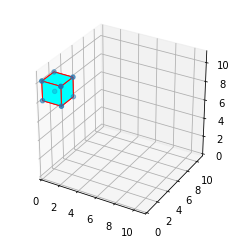

In [238]:
# Plot the cube in 3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.75))
ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.set_xlim(0,11), ax.set_ylim(0,11), ax.set_zlim(0,11)
ax.set_aspect('equal') # uniform scale axes

Use the same method from before to project the 3D points to 2D

In [244]:
pts2d = None # TODO: your code here

In [ ]:
# list of 2D faces
faces2d = [[pts2d[0],pts2d[1],pts2d[2],pts2d[3]],
           [pts2d[4],pts2d[5],pts2d[6],pts2d[7]], 
           [pts2d[0],pts2d[1],pts2d[5],pts2d[4]], 
           [pts2d[2],pts2d[3],pts2d[7],pts2d[6]], 
           [pts2d[1],pts2d[2],pts2d[6],pts2d[5]],
           [pts2d[4],pts2d[7],pts2d[3],pts2d[0]]]

Now we can plot the cube projected on our 2D image:

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
patches = []
for p in np.array(faces2d):
    patches += [Polygon(np.squeeze(p), True)]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(PatchCollection(patches, alpha=0.1, linewidths=1, edgecolors='r'))
ax.scatter(pts2d[:,0,0],pts2d[:,0,1],c=-Z[:,2])
ax.set_xlim(0,640)
ax.set_ylim(0,480)

Try to change the translation of the 3D points, as well as the K matrix, and see how it affects the 2D projection.